In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Load the dataset

In [4]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Step 3: Data Cleaning

In [5]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Rename columns for better readability
df.columns = ['label', 'text']

# Check for missing values
df.isnull().sum()

# Display basic statistics
df.describe()


,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


## Step 4: Data Exploration and Visualization

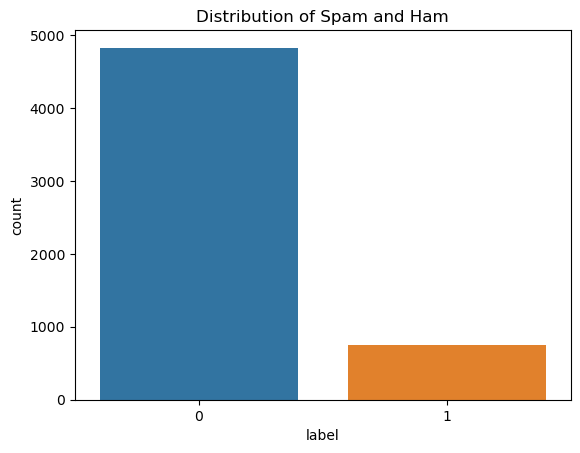

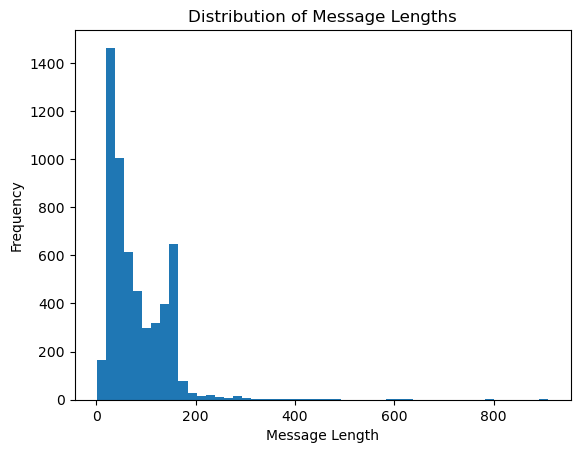

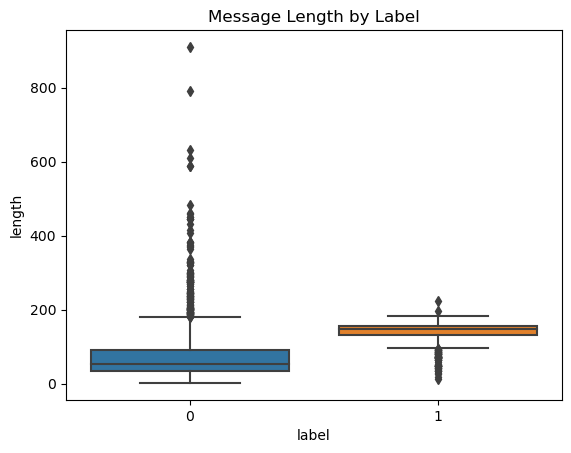

In [9]:
# Visualize the distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham')
plt.show()

# Display the length of messages
df['length'] = df['text'].apply(len)
df['length'].plot(kind='hist', bins=50)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# Display relationship between message length and label
sns.boxplot(x='label', y='length', data=df)
plt.title('Message Length by Label')
plt.show()


## Step 5: Data Preprocessing

In [7]:
# Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Transform text data to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


## Step 6: Model Training and Evaluation

In [8]:
# Train Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Classifier Report")
print(classification_report(y_test, y_pred_nb))
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))


Naive Bayes Classifier Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy:  0.9668161434977578


In [10]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test_tfidf)
print("Logistic Regression Classifier Report")
print(classification_report(y_test, y_pred_lr))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))


Logistic Regression Classifier Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy:  0.9524663677130045


In [11]:
# Train SVM model
svc = SVC()
svc.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_svc = svc.predict(X_test_tfidf)
print("Support Vector Machine Classifier Report")
print(classification_report(y_test, y_pred_svc))
print("Accuracy: ", accuracy_score(y_test, y_pred_svc))


Support Vector Machine Classifier Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy:  0.9766816143497757


## Step 9: Save the Best Model

In [12]:
import joblib

# Assuming Logistic Regression performed best
joblib.dump(lr, 'spam_detection_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']